# Real Estate Sell Price Prediction 

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv("Mumbai1.csv")
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [53]:
# It ignores null values
df.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [55]:
df.shape

(6347, 19)

### Total 6347 rows and 19 columns

In [56]:
# Creating copy of original dataset and deleting column unnamed
data = df.copy()
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [57]:
# Total 413 unique locations and we are encoding them as numeric values
print(len(data.Location.unique()))

413


## Histogram Plot to analyze data 

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'No. of Bedrooms'}>,
        <Axes: title={'center': 'New/Resale'}>],
       [<Axes: title={'center': 'Gymnasium'}>,
        <Axes: title={'center': 'Lift Available'}>,
        <Axes: title={'center': 'Car Parking'}>,
        <Axes: title={'center': 'Maintenance Staff'}>],
       [<Axes: title={'center': '24x7 Security'}>,
        <Axes: title={'center': "Children's Play Area"}>,
        <Axes: title={'center': 'Clubhouse'}>,
        <Axes: title={'center': 'Intercom'}>],
       [<Axes: title={'center': 'Landscaped Gardens'}>,
        <Axes: title={'center': 'Indoor Games'}>,
        <Axes: title={'center': 'Gas Connection'}>,
        <Axes: title={'center': 'Jogging Track'}>],
       [<Axes: title={'center': 'Swimming Pool'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

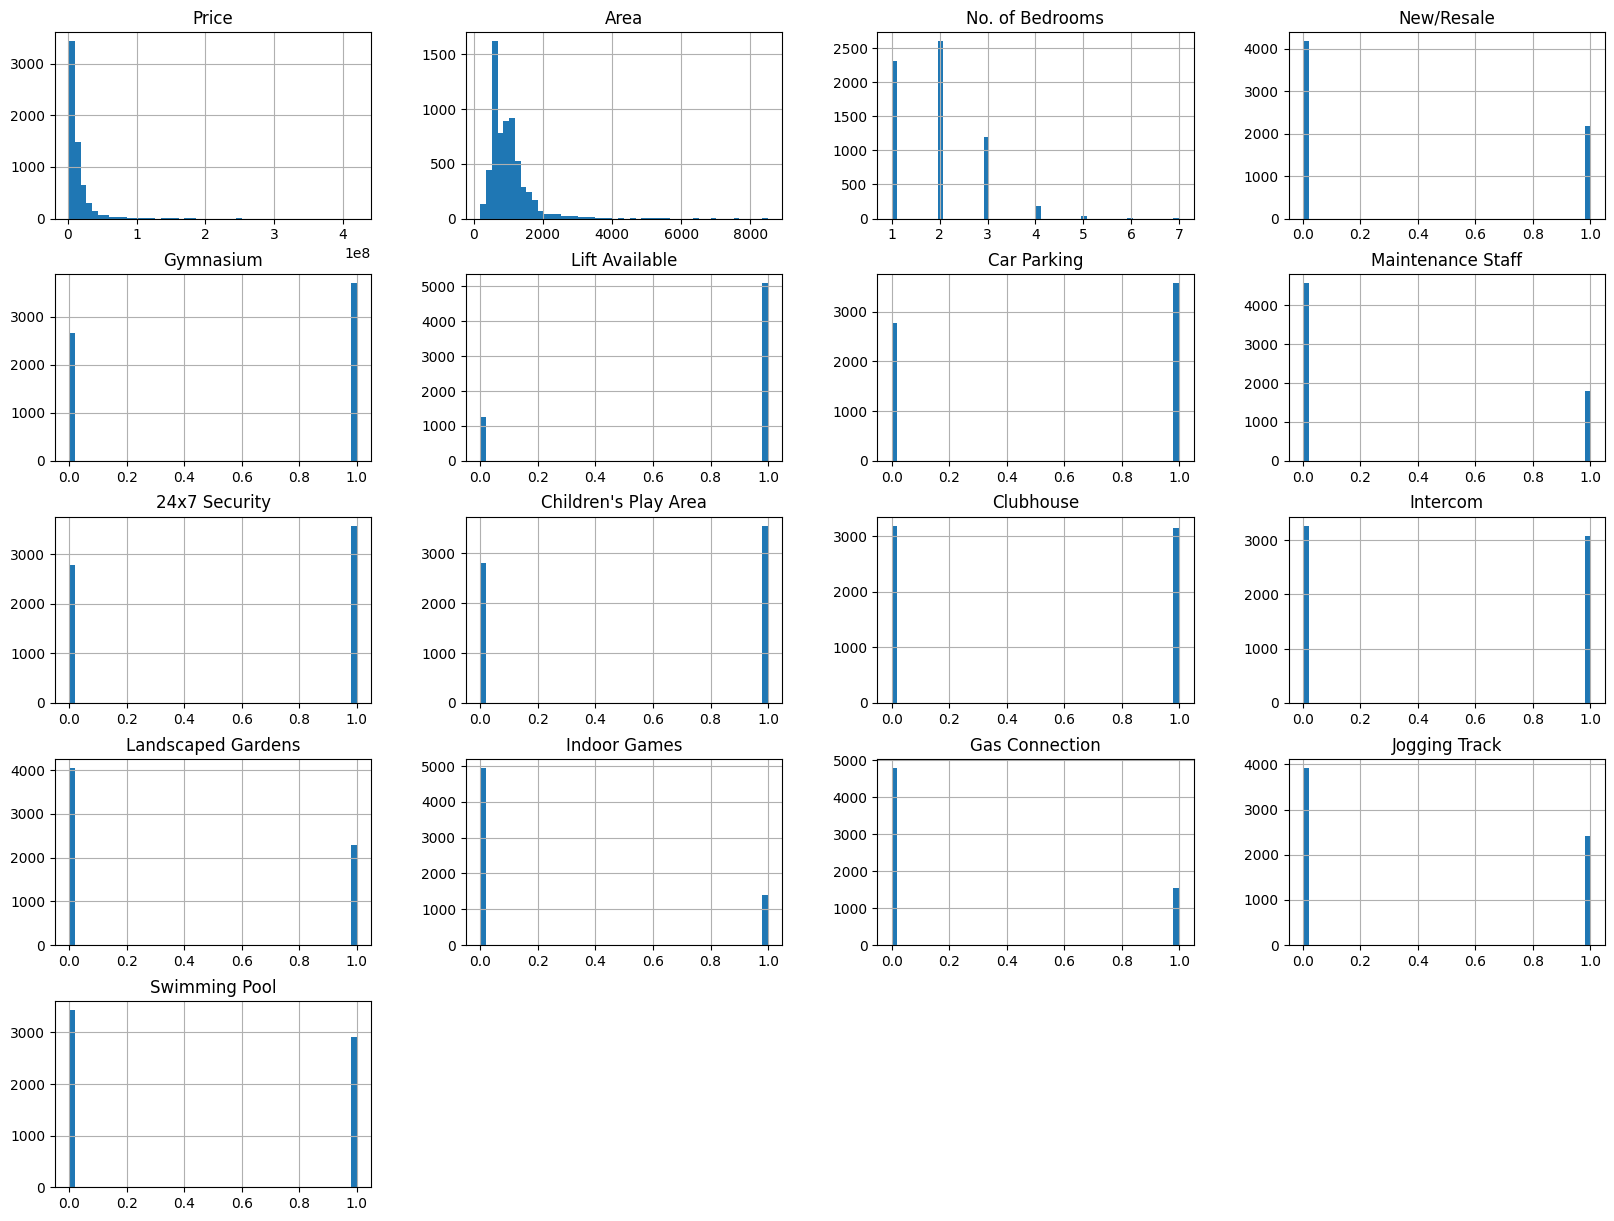

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20,15))

## Finding Correlation of features of flat with its price

### The results are a pearson correlation of 72% between the price of a house and its area and 59% between the price and the number of bedrooms.

In [59]:
corr_matrix = data.corr(method="pearson")
corr_matrix['Price'].sort_values(ascending=False)

C:\Users\Loukik\AppData\Local\Temp\ipykernel_37580\3559956799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method="pearson")


Price                   1.000000
Area                    0.722336
No. of Bedrooms         0.594865
Swimming Pool           0.123902
Indoor Games            0.122352
Gas Connection          0.118245
Gymnasium               0.098097
Clubhouse               0.084775
Lift Available          0.083656
Landscaped Gardens      0.082225
Intercom                0.063060
Car Parking             0.055221
Children's Play Area    0.045126
24x7 Security           0.045107
Jogging Track           0.042325
New/Resale              0.032428
Maintenance Staff       0.027604
Name: Price, dtype: float64

In [60]:
data['Price_in_Lakhs']=data['Price'].div(100000)
data.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,48.5
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,45.0
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,67.0
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,45.0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,50.0


In [61]:
data['price_per_sqft']=data['Price'].div(data['Area'])#.round(2)
data.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,48.5,6736.111111
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,45.0,7500.000000
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,67.0,10307.692308
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,45.0,6923.076923
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,50.0,7518.796992


In [62]:
data.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327,151.540137,13555.465839
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300,201.594263,9573.921483
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1597.444089
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,7234.042553
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,10493.827160
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,175.000000,17142.857143
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,109950.522265


In [63]:
location_count=data['Location'].value_counts()
location_count

Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64

In [64]:
lessthan1=location_count[location_count==1]
lessthan1

Vichumbe             1
Sector 21 Ulwe       1
Gulmohar Road        1
Sector 19A Nerul     1
Vile Parle E         1
                    ..
worli sea face       1
Sea Face             1
Shiv Sagar Estate    1
Natakwala Lane       1
Padle Gaon           1
Name: Location, Length: 177, dtype: int64

In [65]:
#Outlier Detection and Removal

data.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327,151.540137,13555.465839
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300,201.594263,9573.921483
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1597.444089
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,7234.042553
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,10493.827160
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,175.000000,17142.857143
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,109950.522265


In [66]:
data.price_per_sqft.describe()

count      6347.000000
mean      13555.465839
std        9573.921483
min        1597.444089
25%        7234.042553
50%       10493.827160
75%       17142.857143
max      109950.522265
Name: price_per_sqft, dtype: float64

In [67]:
#price per sqft outlier removal
def remove_outliers_sqft(data1):
    df_out=pd.DataFrame()
    for key,subdf in data1.groupby("Location"):
        m=np.mean(subdf.price_per_sqft) #mean
        
        st=np.std(subdf.price_per_sqft) #standard deviation
        
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

new_data=remove_outliers_sqft(data)
new_data.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
count,4.617000e+03,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,1.379964e+07,1000.833875,1.863764,0.336366,0.598007,0.812432,0.556205,0.264241,0.557721,0.590427,0.516353,0.515919,0.367338,0.220923,0.268139,0.398960,0.475634,137.996433,12504.629552
std,1.697580e+07,530.253259,0.828085,0.472517,0.490354,0.390409,0.496885,0.440976,0.496711,0.491808,0.499787,0.499801,0.482132,0.414913,0.443039,0.489738,0.499460,169.758005,8027.939182
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2222.222222
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,7226.277372
50%,9.000000e+06,918.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9727.272727
75%,1.640000e+07,1165.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,163.999990,16363.636364
max,4.200000e+08,8511.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,65075.921909


In [68]:
# Now outliers for Bedrooms

In [69]:
# It tells there are 2601 values with 2 bedroom. It give quick insights about data
new_data['No. of Bedrooms'].value_counts()

2    1901
1    1752
3     832
4     107
5      23
6       2
Name: No. of Bedrooms, dtype: int64

<Axes: xlabel='No. of Bedrooms', ylabel='Price'>

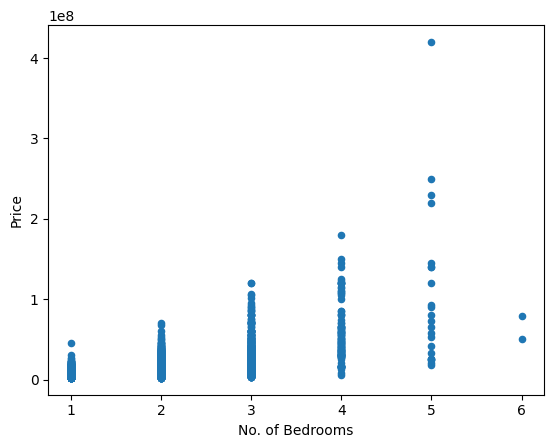

In [70]:
new_data.plot(x="No. of Bedrooms", y="Price",kind="scatter")

In [71]:
new_data[new_data["No. of Bedrooms"] >= 6]

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
104,50000000,2500,Andheri East,6,0,0,1,0,0,0,0,0,1,0,0,1,0,0,500.0,20000.000000
1002,79000000,3300,Goregaon East,6,0,1,1,0,0,0,1,1,1,1,0,1,1,1,790.0,23939.393939


## Outliers in bedroom column

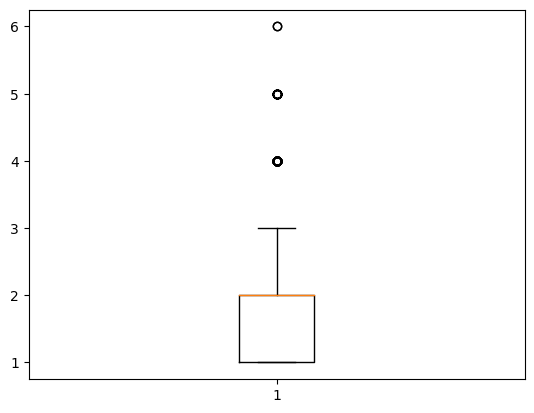

In [72]:
plt.boxplot(new_data["No. of Bedrooms"])
plt.show()

In [73]:
new_data = new_data[new_data["No. of Bedrooms"] <= 5]
new_data['No. of Bedrooms'].value_counts()

2    1901
1    1752
3     832
4     107
5      23
Name: No. of Bedrooms, dtype: int64

In [74]:
new_data.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
count,4.615000e+03,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000
mean,1.377767e+07,1000.010834,1.861972,0.336511,0.598050,0.812351,0.556446,0.264355,0.557963,0.590466,0.516360,0.515710,0.367281,0.221018,0.267822,0.398917,0.475623,137.776713,12500.527681
std,1.694393e+07,528.825996,0.823774,0.472567,0.490345,0.390474,0.496857,0.441037,0.496683,0.491801,0.499786,0.499807,0.482116,0.414978,0.442872,0.489729,0.499460,169.439331,8027.154654
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2222.222222
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,7224.249797
50%,9.000000e+06,916.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9725.906278
75%,1.640000e+07,1165.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,163.999990,16362.118683
max,4.200000e+08,8511.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,65075.921909


<Axes: xlabel='Area', ylabel='Price'>

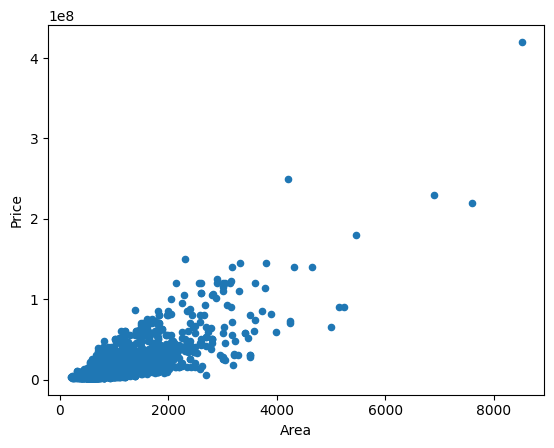

In [75]:
new_data.plot(x="Area", y="Price",kind="scatter")

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='No. of Bedrooms', ylabel='Price'>,
        <Axes: xlabel='Area', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='No. of Bedrooms'>,
        <Axes: xlabel='No. of Bedrooms', ylabel='No. of Bedrooms'>,
        <Axes: xlabel='Area', ylabel='No. of Bedrooms'>],
       [<Axes: xlabel='Price', ylabel='Area'>,
        <Axes: xlabel='No. of Bedrooms', ylabel='Area'>,
        <Axes: xlabel='Area', ylabel='Area'>]], dtype=object)

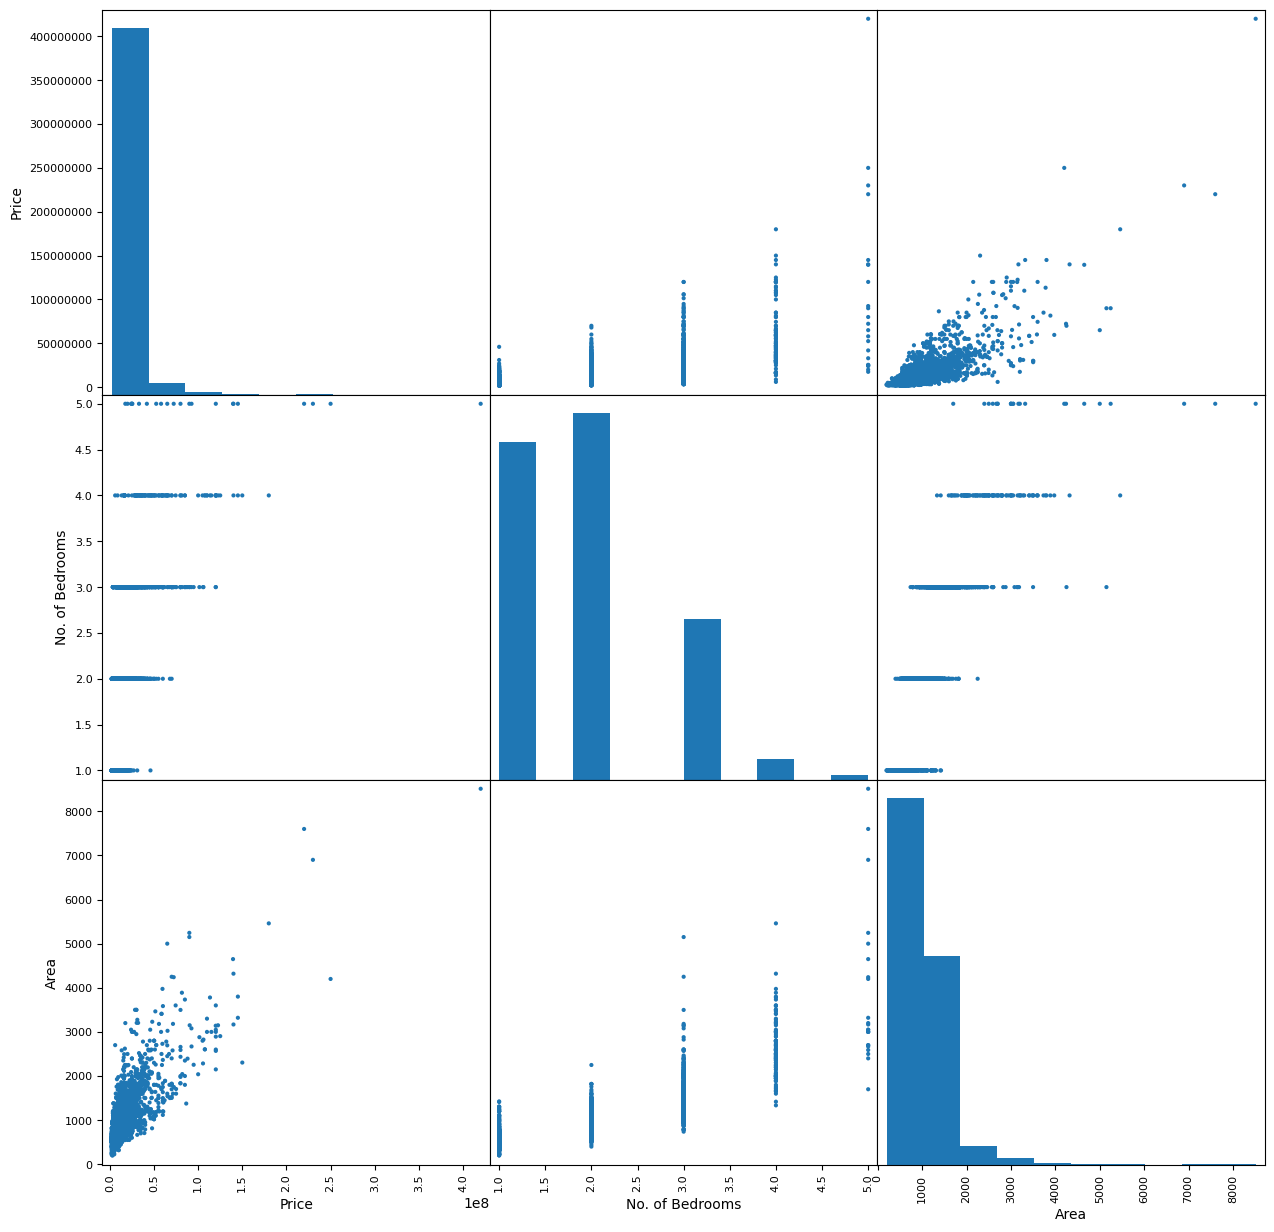

In [76]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "No. of Bedrooms", "Area"]
scatter_matrix(new_data[attributes], figsize=(15,15), alpha=1)

In [77]:
new_data.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
0,6200000,400,Airoli,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,62.0,15500.000000
1,9500000,1000,Airoli,2,0,0,1,1,1,1,0,1,0,0,0,0,0,1,95.0,9500.000000
2,14900000,1245,Airoli,2,1,0,1,1,0,0,0,0,0,0,0,1,0,0,149.0,11967.871486
3,14000000,1183,Airoli,2,1,1,1,1,0,1,1,1,1,1,1,0,1,1,140.0,11834.319527
4,14800000,1245,Airoli,2,0,0,1,1,1,1,0,0,0,0,0,0,0,0,148.0,11887.550201


In [78]:
new_data.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_in_Lakhs,price_per_sqft
count,4.615000e+03,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000,4615.000000
mean,1.377767e+07,1000.010834,1.861972,0.336511,0.598050,0.812351,0.556446,0.264355,0.557963,0.590466,0.516360,0.515710,0.367281,0.221018,0.267822,0.398917,0.475623,137.776713,12500.527681
std,1.694393e+07,528.825996,0.823774,0.472567,0.490345,0.390474,0.496857,0.441037,0.496683,0.491801,0.499786,0.499807,0.482116,0.414978,0.442872,0.489729,0.499460,169.439331,8027.154654
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2222.222222
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,7224.249797
50%,9.000000e+06,916.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9725.906278
75%,1.640000e+07,1165.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,163.999990,16362.118683
max,4.200000e+08,8511.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,65075.921909


In [79]:
new_data.shape

(4615, 20)

In [80]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder() # creating instance of labelencoder
# Replacing Location with Location_encoded column 
#new_data['Location'] = labelencoder.fit_transform(new_data['Location'])
#new_data = new_data.rename(columns={'Location':'Location_encoded'})
#new_data.head()

In [81]:
#new_data['Location_encoded'].unique()

In [82]:
new_data['Location'].value_counts()

Kharghar           399
Thane West         361
Mira Road East     326
Ulwe               242
Kalyan West        137
                  ... 
MHADA Colony 20      1
Tolaram Colony       1
Link Road            1
Uran                 1
Hanuman Nagar        1
Name: Location, Length: 232, dtype: int64

In [83]:
new_data['Location']=new_data['Location'].apply(lambda x: x.strip())
location_count=new_data['Location'].value_counts()
new_data['Location']

C:\Users\Loukik\AppData\Local\Temp\ipykernel_37580\3884181856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Location']=new_data['Location'].apply(lambda x: x.strip())


0                        Airoli
1                        Airoli
2                        Airoli
3                        Airoli
4                        Airoli
                 ...           
4612    vasant vihar thane west
4613            vile parle west
4614            vile parle west
4615            vile parle west
4616            vile parle west
Name: Location, Length: 4615, dtype: object

In [84]:
location_count
#232 unique location value

Kharghar           399
Thane West         361
Mira Road East     326
Ulwe               242
Kalyan West        137
                  ... 
MHADA Colony 20      1
Tolaram Colony       1
Link Road            1
Uran                 1
Hanuman Nagar        1
Name: Location, Length: 232, dtype: int64

In [85]:
location_count_less_than_10=location_count[location_count<=10]
location_count_less_than_10

Khar West          10
Vashi               9
Nalasopara East     9
Andheri             9
Sion                9
                   ..
MHADA Colony 20     1
Tolaram Colony      1
Link Road           1
Uran                1
Hanuman Nagar       1
Name: Location, Length: 156, dtype: int64

In [86]:
new_data['Location']=new_data['Location'].apply(lambda x:"Others" if x in location_count_less_than_10 else x )
new_data['Location']

C:\Users\Loukik\AppData\Local\Temp\ipykernel_37580\2616200721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Location']=new_data['Location'].apply(lambda x:"Others" if x in location_count_less_than_10 else x )


0       Airoli
1       Airoli
2       Airoli
3       Airoli
4       Airoli
         ...  
4612    Others
4613    Others
4614    Others
4615    Others
4616    Others
Name: Location, Length: 4615, dtype: object

In [87]:
final_data=new_data.drop(columns=['Price','price_per_sqft','Gymnasium',"Children's Play Area",'Swimming Pool','Intercom','Jogging Track','Landscaped Gardens','Indoor Games'])
final_data

,Area,Location,No. of Bedrooms,New/Resale,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Clubhouse,Gas Connection,Price_in_Lakhs
0,400,Airoli,1,0,1,1,1,1,0,0,62.0
1,1000,Airoli,2,0,1,1,1,1,1,0,95.0
2,1245,Airoli,2,1,1,1,0,0,0,1,149.0
3,1183,Airoli,2,1,1,1,0,1,1,0,140.0
4,1245,Airoli,2,0,1,1,1,1,0,0,148.0
...,...,...,...,...,...,...,...,...,...,...,...
4612,1065,Others,2,0,1,1,1,1,0,0,115.0
4613,1509,Others,3,1,1,0,0,0,0,1,475.0
4614,1073,Others,2,1,1,0,0,0,0,1,335.0
4615,1735,Others,3,1,0,0,0,0,0,0,580.0


In [88]:
final_data.to_csv("Cleaned_data.csv")

In [89]:
X = final_data.drop(columns=['Price_in_Lakhs'])
X

,Area,Location,No. of Bedrooms,New/Resale,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Clubhouse,Gas Connection
0,400,Airoli,1,0,1,1,1,1,0,0
1,1000,Airoli,2,0,1,1,1,1,1,0
2,1245,Airoli,2,1,1,1,0,0,0,1
3,1183,Airoli,2,1,1,1,0,1,1,0
4,1245,Airoli,2,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4612,1065,Others,2,0,1,1,1,1,0,0
4613,1509,Others,3,1,1,0,0,0,0,1
4614,1073,Others,2,1,1,0,0,0,0,1
4615,1735,Others,3,1,0,0,0,0,0,0


In [90]:
Y = final_data['Price_in_Lakhs']
Y

0        62.0
1        95.0
2       149.0
3       140.0
4       148.0
        ...  
4612    115.0
4613    475.0
4614    335.0
4615    580.0
4616    275.0
Name: Price_in_Lakhs, Length: 4615, dtype: float64

In [91]:
X.shape

(4615, 10)

In [92]:
Y.shape

(4615,)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)
#print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

In [94]:
#train_set['No. of Bedrooms'].value_counts()

In [95]:
#test_set['No. of Bedrooms'].value_counts()

In [96]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615 entries, 0 to 4616
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4615 non-null   int64  
 1   Location           4615 non-null   object 
 2   No. of Bedrooms    4615 non-null   int64  
 3   New/Resale         4615 non-null   int64  
 4   Lift Available     4615 non-null   int64  
 5   Car Parking        4615 non-null   int64  
 6   Maintenance Staff  4615 non-null   int64  
 7   24x7 Security      4615 non-null   int64  
 8   Clubhouse          4615 non-null   int64  
 9   Gas Connection     4615 non-null   int64  
 10  Price_in_Lakhs     4615 non-null   float64
dtypes: float64(1), int64(9), object(1)
memory usage: 432.7+ KB


### Applying Linear Regression

In [97]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

column_trans=make_column_transformer((OneHotEncoder(sparse=False),['Location']),remainder='passthrough')

In [98]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['Location'])])

In [99]:
scaler = StandardScaler()

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()

In [101]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(column_trans,scaler,lr)

In [102]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [103]:
pipe.fit(X_train,y_train)

C:\Users\Loukik\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [104]:
X_test.head()

,Area,Location,No. of Bedrooms,New/Resale,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Clubhouse,Gas Connection
4210,1155,Ulwe,2,0,0,0,0,0,0,0
585,325,Borivali West,1,0,1,0,0,0,0,1
160,930,Andheri West,2,1,1,0,0,0,1,1
4366,611,Others,2,1,1,1,0,1,0,0
2308,900,Malad West,2,1,1,0,1,1,0,0


In [105]:
y_pred_lr=pipe.predict(X_test)

In [106]:
y_pred_lr

array([ 1.16391113e+02,  3.92839862e+01,  2.54147290e+02,  6.97895504e+01,
        1.19926269e+02,  1.29102050e+02,  5.09887691e+01,  2.17203613e+02,
        1.84268361e+02,  1.08691916e+02, -1.65385524e+01, -8.76123087e+00,
        1.19043479e+02,  1.66850392e+02,  7.13309082e+02,  6.81645019e+02,
        2.34731441e+01,  5.69458004e+01,  1.17875510e+02,  1.06880101e+01,
        1.38889477e+02,  6.05317379e+01,  2.54848629e+01,  9.43833004e+01,
        3.33208004e+01,  1.31117675e+02,  9.32449460e+01,  1.32473166e+02,
        3.31691639e+00,  2.12973144e+02,  6.53520504e+01,  1.16518383e+02,
        5.65227073e+02,  6.42136960e+01,  1.86340354e+02,  1.09530102e+02,
        1.02512207e+02,  1.10219238e+02,  8.54731664e+01,  1.54387207e+02,
        1.19820800e+02, -4.89604496e+01,  3.33434104e+02,  1.44941894e+02,
        5.64892538e+00,  1.09530102e+02,  2.23191425e+01,  3.14264477e+02,
        1.64359885e+02,  1.06502758e+02,  3.04184566e+01,  2.62879147e+01,
        5.32426976e+01,  

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr)

0.7870140366597916

### Applying Lasso

In [108]:
lasso = Lasso()

In [109]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [110]:
pipe.fit(X_train,y_train)

C:\Users\Loukik\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [111]:
y_pred_lasso=pipe.predict(X_test)

In [112]:
r2_score(y_test,y_pred_lasso)

0.782627534442891

### Applying Ridge

In [113]:
ridge = Ridge()
pipe = make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

C:\Users\Loukik\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.787308978895473

### Applying Decision Tree

In [114]:
dt = DecisionTreeRegressor()
pipe = make_pipeline(column_trans,scaler,dt)
pipe.fit(X_train,y_train)
y_pred_dt=pipe.predict(X_test)
r2_score(y_test,y_pred_dt)

C:\Users\Loukik\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7752952292816051

### Applying KNeighborsRegressor

In [115]:
kn = KNeighborsRegressor()
pipe = make_pipeline(column_trans,scaler,kn)
pipe.fit(X_train,y_train)
y_pred_kn=pipe.predict(X_test)
r2_score(y_test,y_pred_kn)

C:\Users\Loukik\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7897320066114972

### Applying RandomForestRegressor

In [116]:
rf = RandomForestRegressor()
pipe = make_pipeline(column_trans,scaler,rf)
pipe.fit(X_train,y_train)
y_pred_rf=pipe.predict(X_test)
r2_score(y_test,y_pred_rf)

C:\Users\Loukik\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8579382355085927

In [117]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, y_pred_rf)
final_rmse = np.sqrt(final_mse)
final_rmse

53.36972481600547

In [118]:
print("LR:",r2_score(y_test,y_pred_lr))
print("Lasso:",r2_score(y_test,y_pred_lasso))
print("Ridge:",r2_score(y_test,y_pred_ridge))
print("Decision Tree:",r2_score(y_test,y_pred_dt))
print("KNN:",r2_score(y_test,y_pred_kn))
print("RF:",r2_score(y_test,y_pred_rf))

LR: 0.7870140366597916
Lasso: 0.782627534442891
Ridge: 0.787308978895473
Decision Tree: 0.7752952292816051
KNN: 0.7897320066114972
RF: 0.8579382355085927


In [119]:
import pickle

In [120]:
pickle.dump(pipe,open('RandomForest_model.pkl','wb'))

In [121]:
X_test

,Area,Location,No. of Bedrooms,New/Resale,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Clubhouse,Gas Connection
4210,1155,Ulwe,2,0,0,0,0,0,0,0
585,325,Borivali West,1,0,1,0,0,0,0,1
160,930,Andheri West,2,1,1,0,0,0,1,1
4366,611,Others,2,1,1,1,0,1,0,0
2308,900,Malad West,2,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4113,450,Ulwe,1,0,1,1,0,1,0,0
1838,1088,Kharghar,2,0,1,1,1,1,0,0
3194,1110,Panvel,2,1,0,0,0,0,0,0
1883,1255,Kharghar,2,0,1,1,1,1,1,0


In [122]:
row_list = X_train.loc[2,:].values.flatten().tolist()
print(row_list)

[1245, 'Airoli', 2, 1, 1, 1, 0, 0, 0, 1]


House 	
1. Area	
2. Location	
3. No. of Bedrooms	
4. New/Resale	
5. Lift Available	
6. Car Parking	
7. Maintenance Staff	
8. 24x7 Security	
9. Clubhouse	
10. Gas Connection